In [1]:
from pathlib import Path

import yaml
import polars as pl
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import scienceplots

In [2]:
plt.style.use(['science','ieee'])

In [3]:
window_size = 5000

---

In [4]:
paths = [path for path in Path('../sweep/n_episodes_20000/').rglob('**/**/blackjack__rewards.csv')]
len(paths)

2100

In [5]:
dfs = list()
for elem in paths:
    cpath = elem.parent / '.hydra/config.yaml'
    with open(cpath, 'r') as f:
        cfg = yaml.load(f, yaml.Loader)
    
    cfg.pop('n_observations')
    cfg.pop('interactive')
    cfg.pop('rewardspec')

    df = pd.json_normalize(cfg)
    df['path'] = str(cpath)
    dfs.append(df)

In [6]:
def read_rewards(path: str, i: int):
    toread = Path(path).parent.parent / 'blackjack__rewards.csv'
    return pl.read_csv(toread, has_header=False).rename({'column_1': f'exec_{i:02d}'})

In [7]:
concat = pl.DataFrame(pd.concat(dfs))

## Eval Gamma

In [8]:
(
    concat
    .filter(
        (pl.col('qtable.alpha') == 0.1)
    )
    .group_by('qtable.gamma')
    .agg(pl.count('qtable.gamma').alias('count'))
    .sort('qtable.gamma')
)

qtable.gamma,count
f64,u32
0.0,30
0.1,30
0.3,30
0.6,30
0.7,30
0.8,30
0.9,30
0.95,30
0.99,30


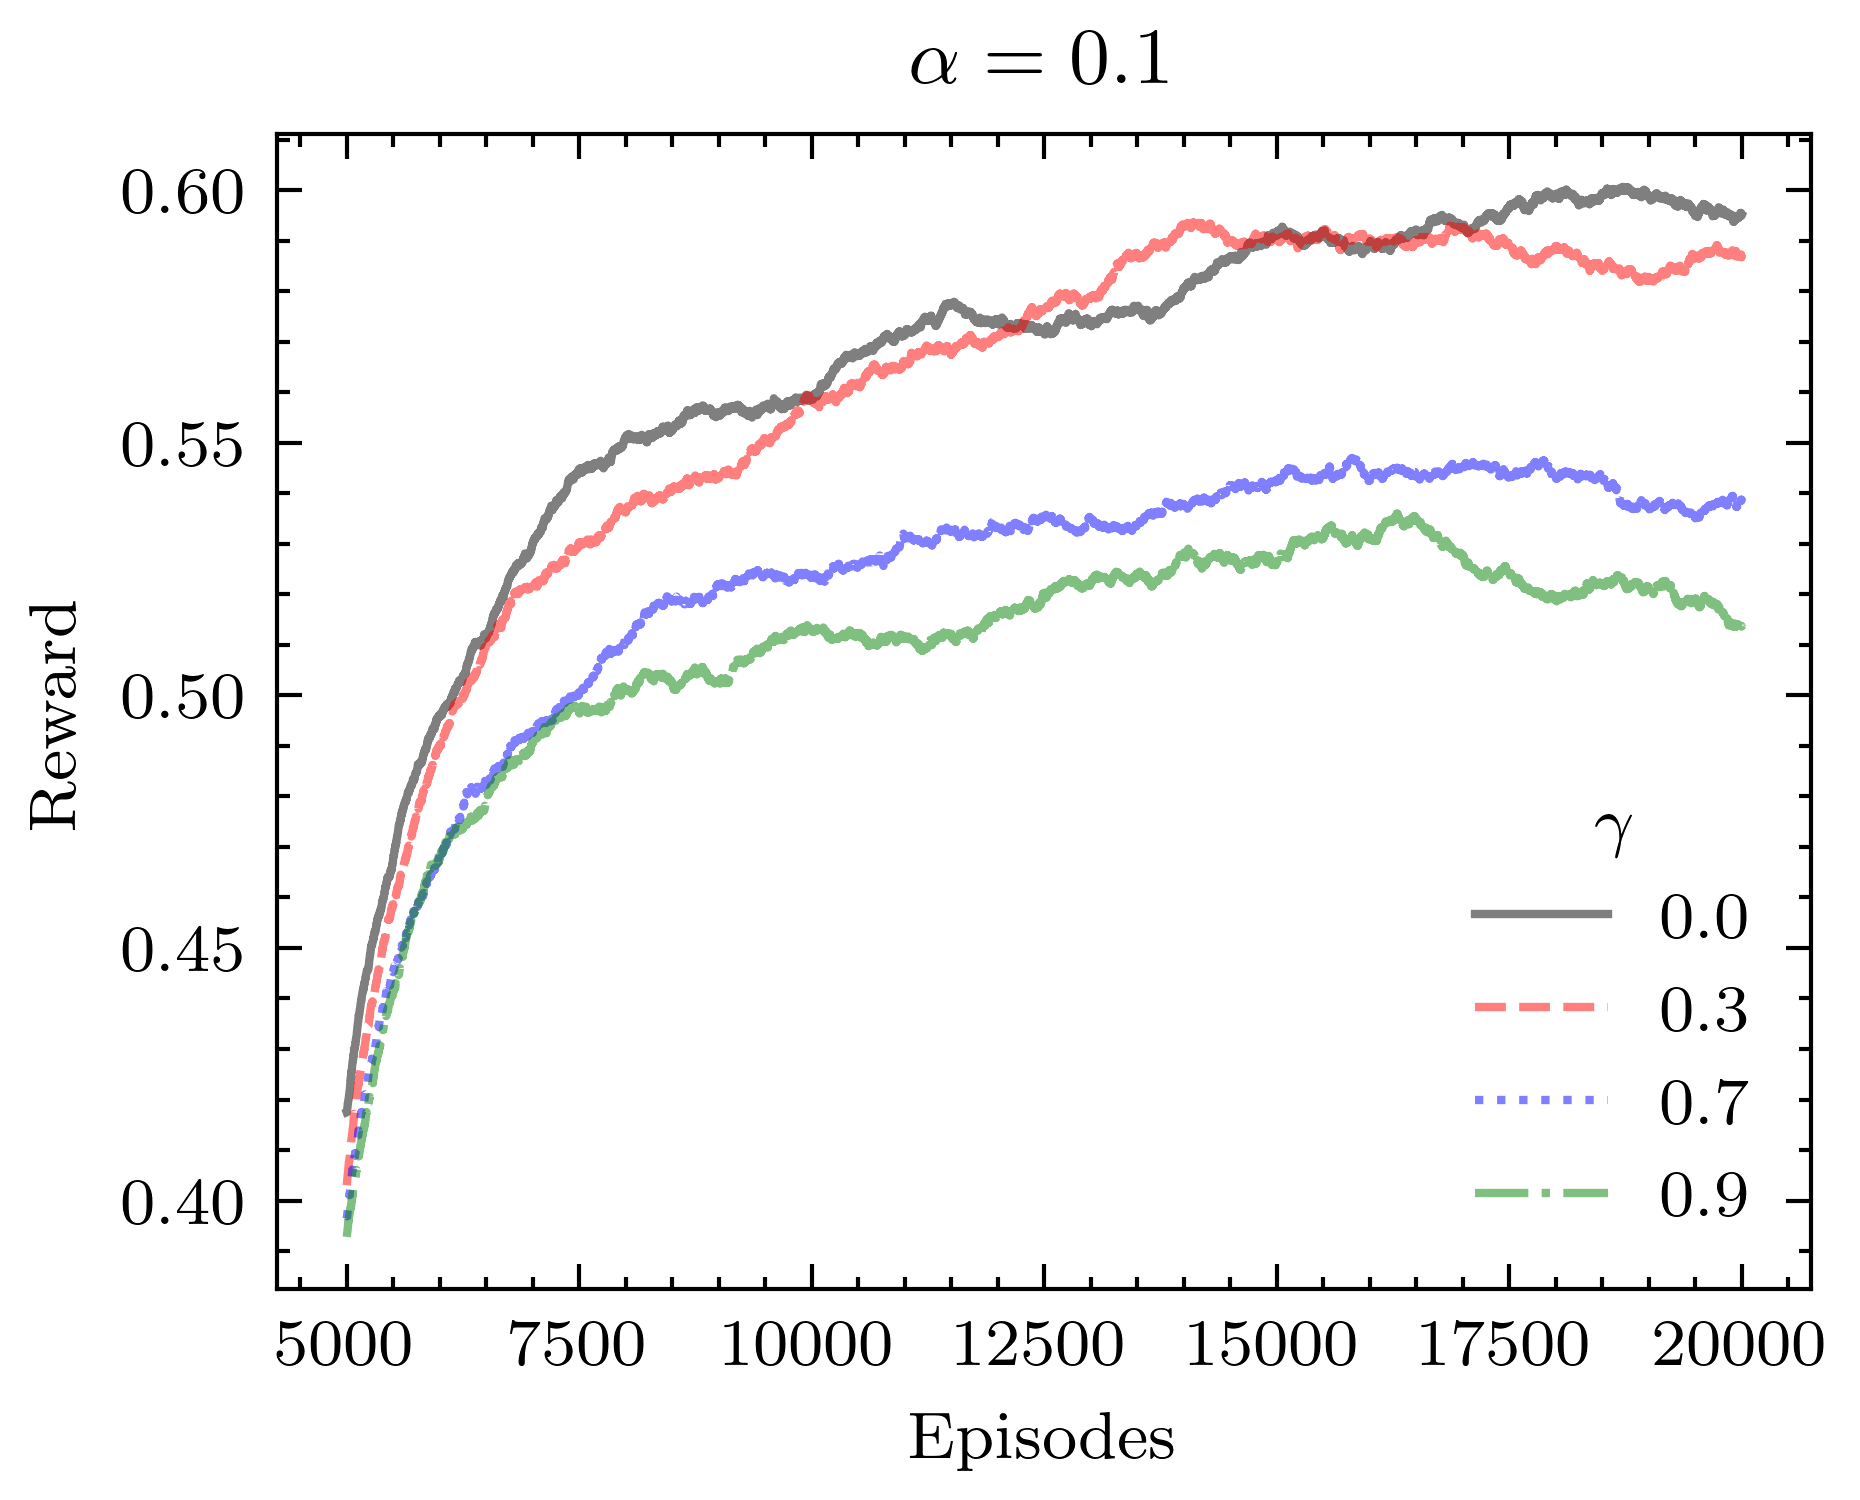

In [9]:
alpha = 0.1

groupby = (
    concat
    .filter(
        (pl.col('qtable.alpha') == alpha)
        & (pl.col('qtable.gamma').is_in([0.0, 0.3, 0.7, 0.9]))
    )
    .to_pandas()
    .groupby('qtable.gamma')
)

ax = plt.gca()

for name, group in groupby:
    paths = group['path'].tolist()

    df_rewards = pl.concat(
        items=[read_rewards(path, i) for i, path in enumerate(paths)],
        how='horizontal',
    )

    (
        df_rewards
        .mean(axis=1)
        .rolling_mean(window_size=window_size)
        .to_pandas()
        .plot(ax=ax, alpha=0.5, label=name)
    )

plt.legend(title='$\\gamma$')
plt.ylabel('Reward')
plt.xlabel('Episodes')
plt.title(f'$\\alpha={alpha}$')
plt.show()
plt.close()

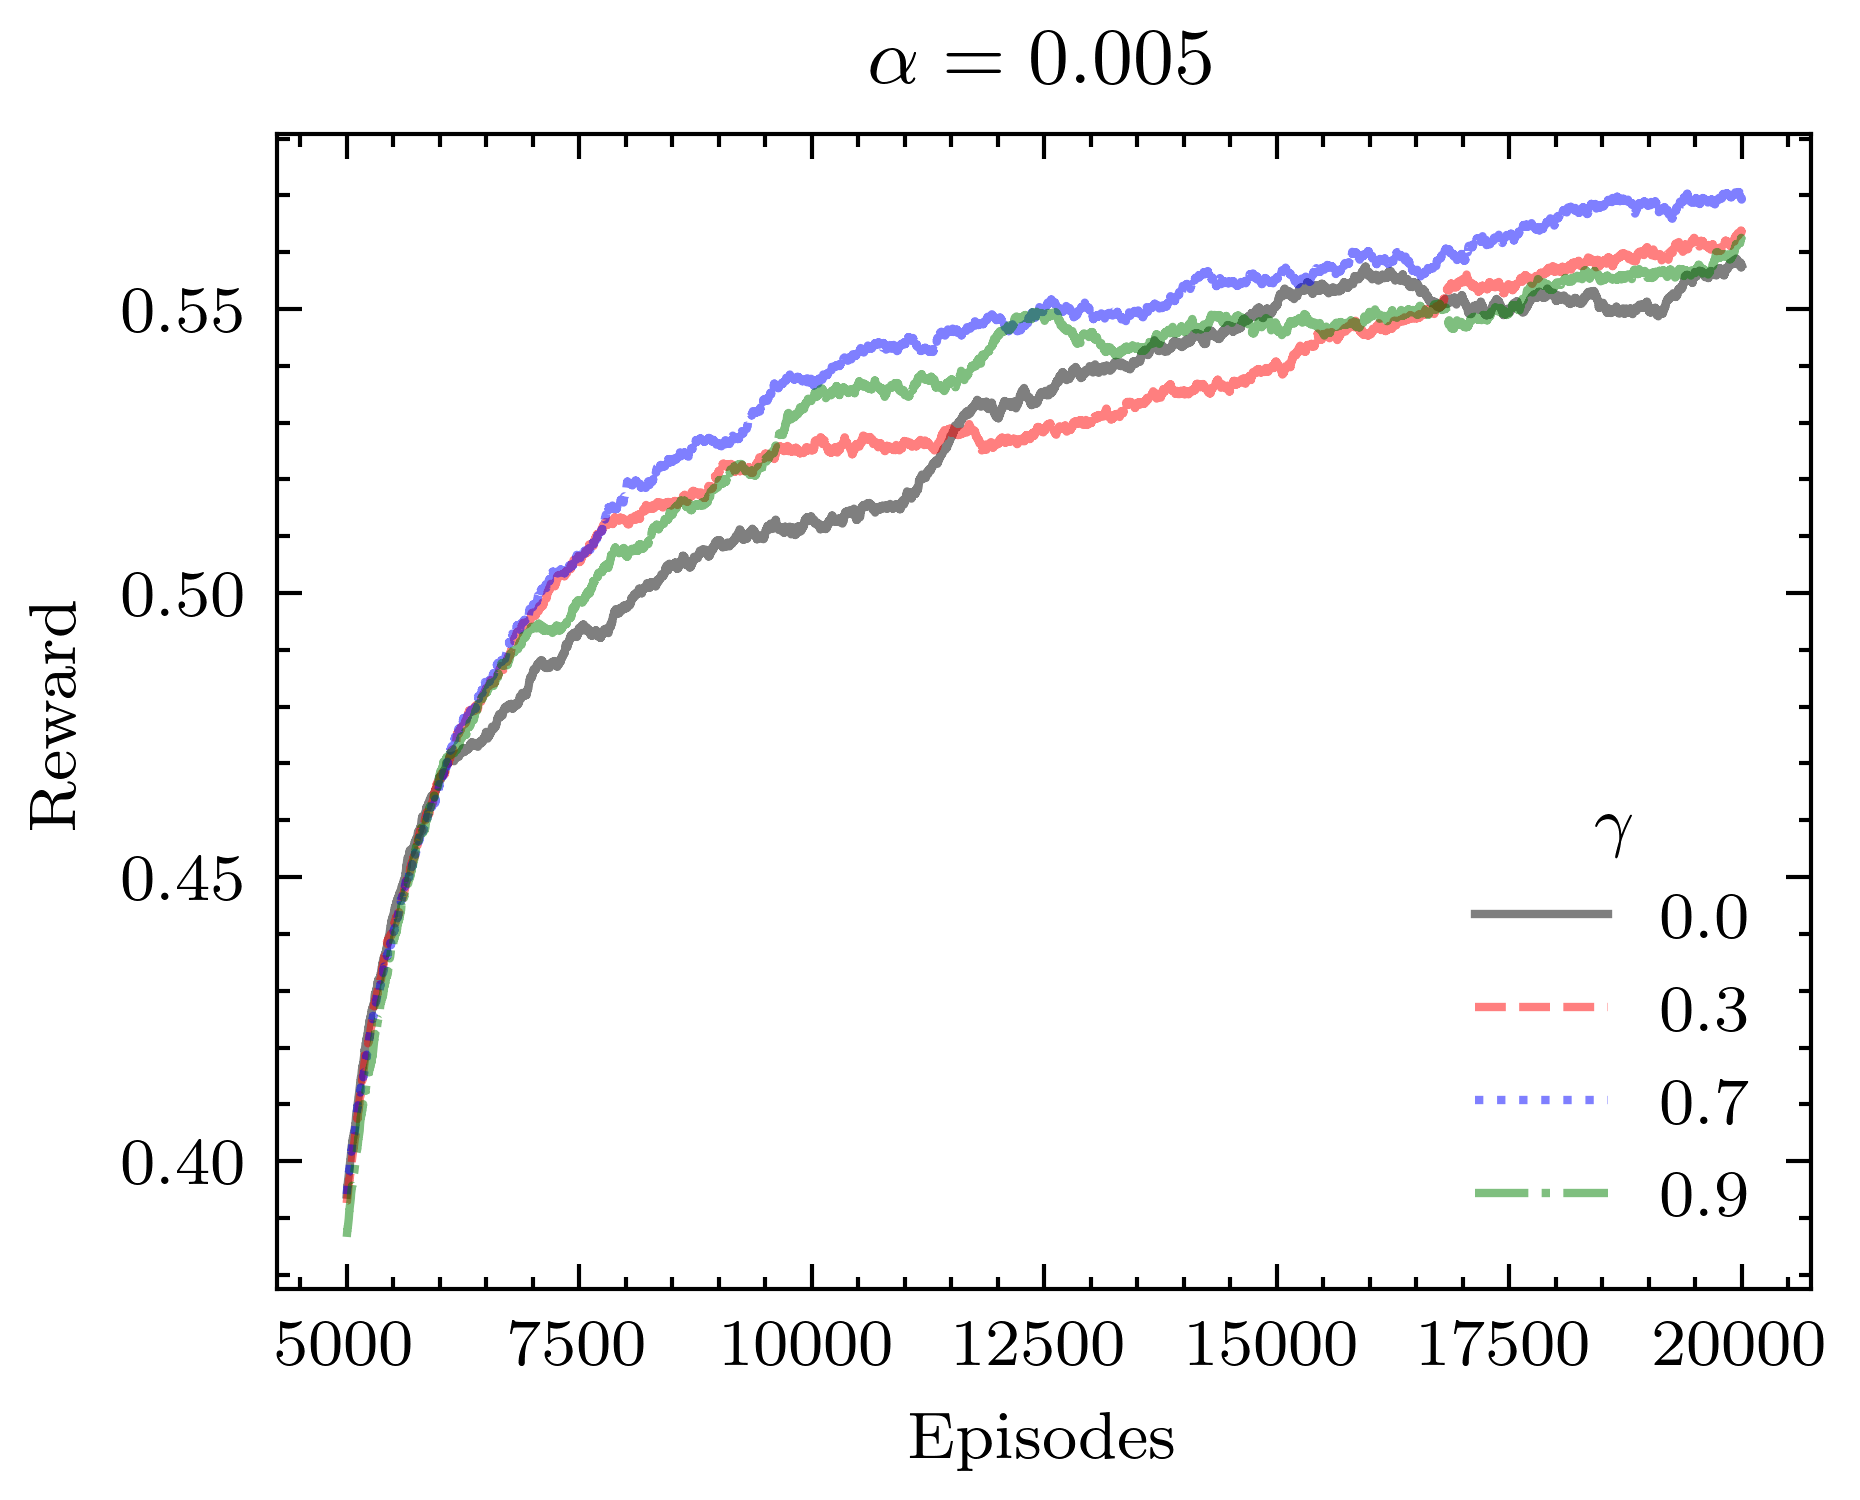

In [10]:
alpha = 0.005

groupby = (
    concat
    .filter(
        (pl.col('qtable.alpha') == alpha)
        & (pl.col('qtable.gamma').is_in([0.0, 0.3, 0.7, 0.9]))
    )
    .to_pandas()
    .groupby('qtable.gamma')
)

ax = plt.gca()

for name, group in groupby:
    paths = group['path'].tolist()

    df_rewards = pl.concat(
        items=[read_rewards(path, i) for i, path in enumerate(paths)],
        how='horizontal',
    )

    (
        df_rewards
        .mean(axis=1)
        .rolling_mean(window_size=window_size)
        .to_pandas()
        .plot(ax=ax, alpha=0.5, label=name)
    )

plt.legend(title='$\\gamma$')
plt.ylabel('Reward')
plt.xlabel('Episodes')
plt.title(f'$\\alpha={alpha}$')
plt.show()
plt.close()

## Eval Alpha

In [11]:
(
    concat
    .filter(
        (pl.col('qtable.gamma') == 0.99)
    )
    .group_by('qtable.alpha')
    .agg(pl.count('qtable.alpha').alias('count'))
    .sort('qtable.alpha')
)

qtable.alpha,count
f64,u32
0.001,30
0.005,30
0.01,30
0.05,30
0.1,30
0.2,30
0.4,30


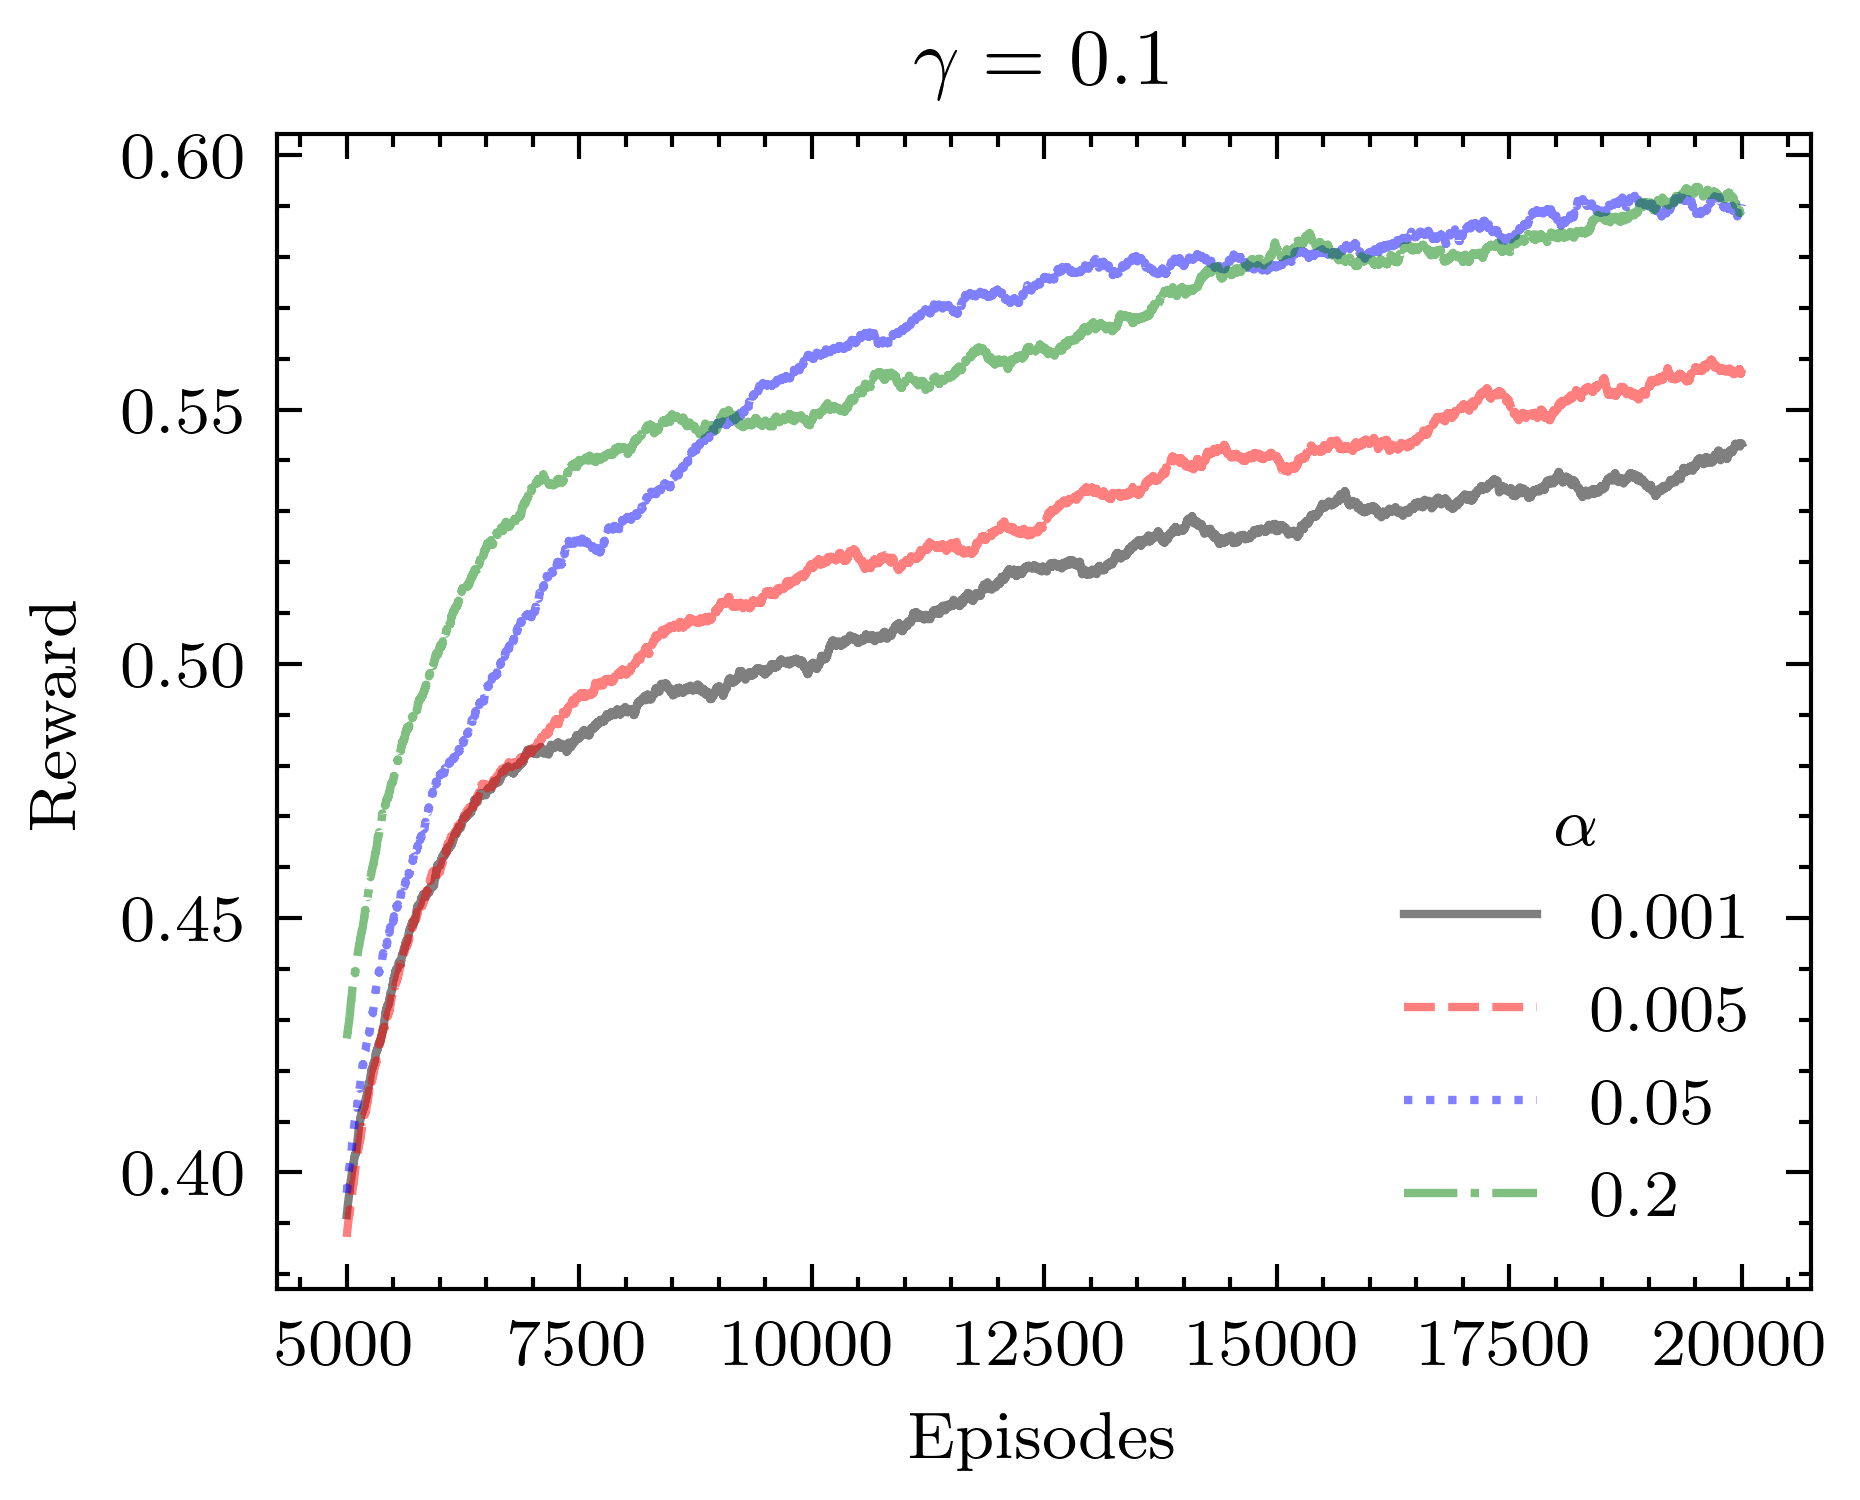

In [56]:
gamma = 0.1

groupby = (
    concat
    .filter(
        (pl.col('qtable.gamma') == gamma)
        & (pl.col('qtable.alpha').is_in([0.2, 0.05, 0.005, 0.001]))
    )
    .to_pandas()
    .groupby('qtable.alpha')
)

ax = plt.gca()

for name, group in groupby:
    paths = group['path'].tolist()

    df_rewards = pl.concat(
        items=[read_rewards(path, i) for i, path in enumerate(paths)],
        how='horizontal',
    )

    (
        df_rewards
        .mean(axis=1)
        .rolling_mean(window_size=window_size)
        .to_pandas()
        .plot(ax=ax, alpha=0.5, label=name)
    )

plt.legend(title='$\\alpha$')
plt.ylabel('Reward')
plt.xlabel('Episodes')
plt.title(f'$\\gamma={gamma}$')
plt.show()
plt.close()

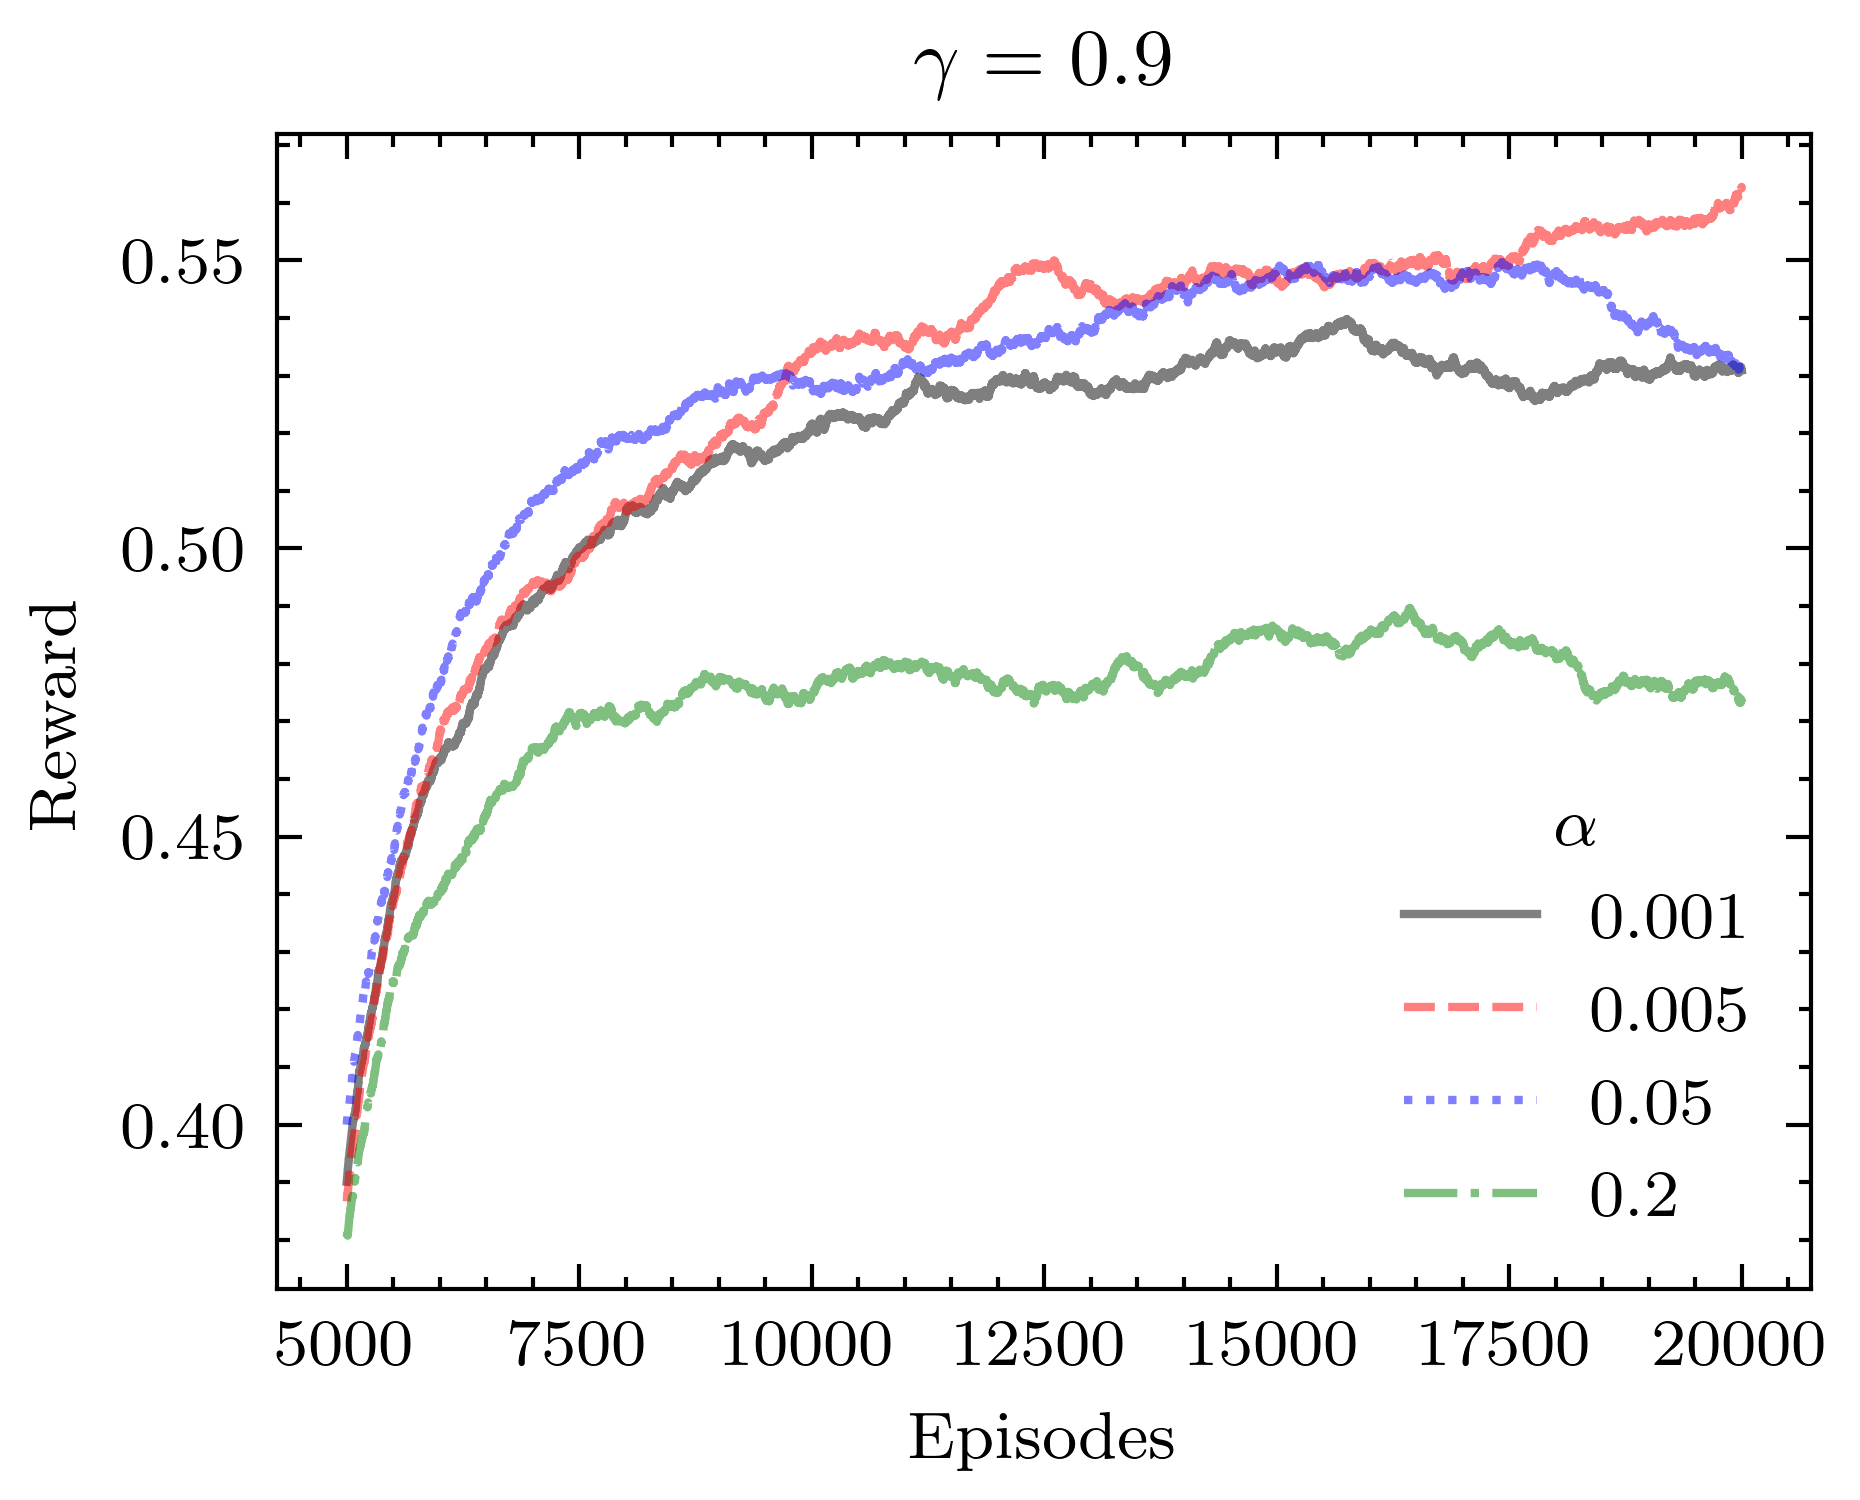

In [13]:
gamma = 0.9

groupby = (
    concat
    .filter(
        (pl.col('qtable.gamma') == gamma)
        & (pl.col('qtable.alpha').is_in([0.2, 0.05, 0.005, 0.001]))
    )
    .to_pandas()
    .groupby('qtable.alpha')
)

ax = plt.gca()

for name, group in groupby:
    paths = group['path'].tolist()

    df_rewards = pl.concat(
        items=[read_rewards(path, i) for i, path in enumerate(paths)],
        how='horizontal',
    )

    (
        df_rewards
        .mean(axis=1)
        .rolling_mean(window_size=window_size)
        .to_pandas()
        .plot(ax=ax, alpha=0.5, label=name)
    )

plt.legend(title='$\\alpha$')
plt.ylabel('Reward')
plt.xlabel('Episodes')
plt.title(f'$\\gamma={gamma}$')
plt.show()
plt.close()

# Data Summary

In [14]:
results = list()

In [15]:
for name, group in tqdm(concat.to_pandas().groupby(['qtable.gamma', 'qtable.alpha'])):
    paths = group['path'].tolist()

    df_rewards = pl.concat(
        items=[read_rewards(path, i) for i, path in enumerate(paths)],
        how='horizontal',
    )

    df_roll_mean = (
        df_rewards
        .mean(axis=1)
        .rolling_mean(window_size=window_size)
    )

    df_roll_std = (
        df_rewards
        .mean(axis=1)
        .rolling_std(window_size=window_size)
    )

    df_roll_sum = (
        df_rewards
        .mean(axis=1)
        .rolling_sum(window_size=window_size)
    )

    results.append({
        'qtable.gamma': name[0],
        'qtable.alpha': name[1],
        'reward.roll.mean': df_roll_mean.slice(length=1, offset=-1).item(),
        'reward.roll.std': df_roll_std.slice(length=1, offset=-1).item(),
        'reward.roll.sum': df_roll_sum.slice(length=1, offset=-1).item(),
    })

100%|██████████| 70/70 [00:01<00:00, 50.94it/s]


In [16]:
df_results = pd.json_normalize(results)

In [17]:
(
    pl.DataFrame(df_results)
    .sort('reward.roll.mean', descending=True)
    .head()
)

qtable.gamma,qtable.alpha,reward.roll.mean,reward.roll.std,reward.roll.sum
f64,f64,f64,f64,f64
0.0,0.2,0.599047,0.391945,2995.233333
0.0,0.1,0.595087,0.382968,2975.433333
0.1,0.1,0.592973,0.39201,2964.866667
0.1,0.05,0.590393,0.384759,2951.966667
0.0,0.4,0.589927,0.394864,2949.633333


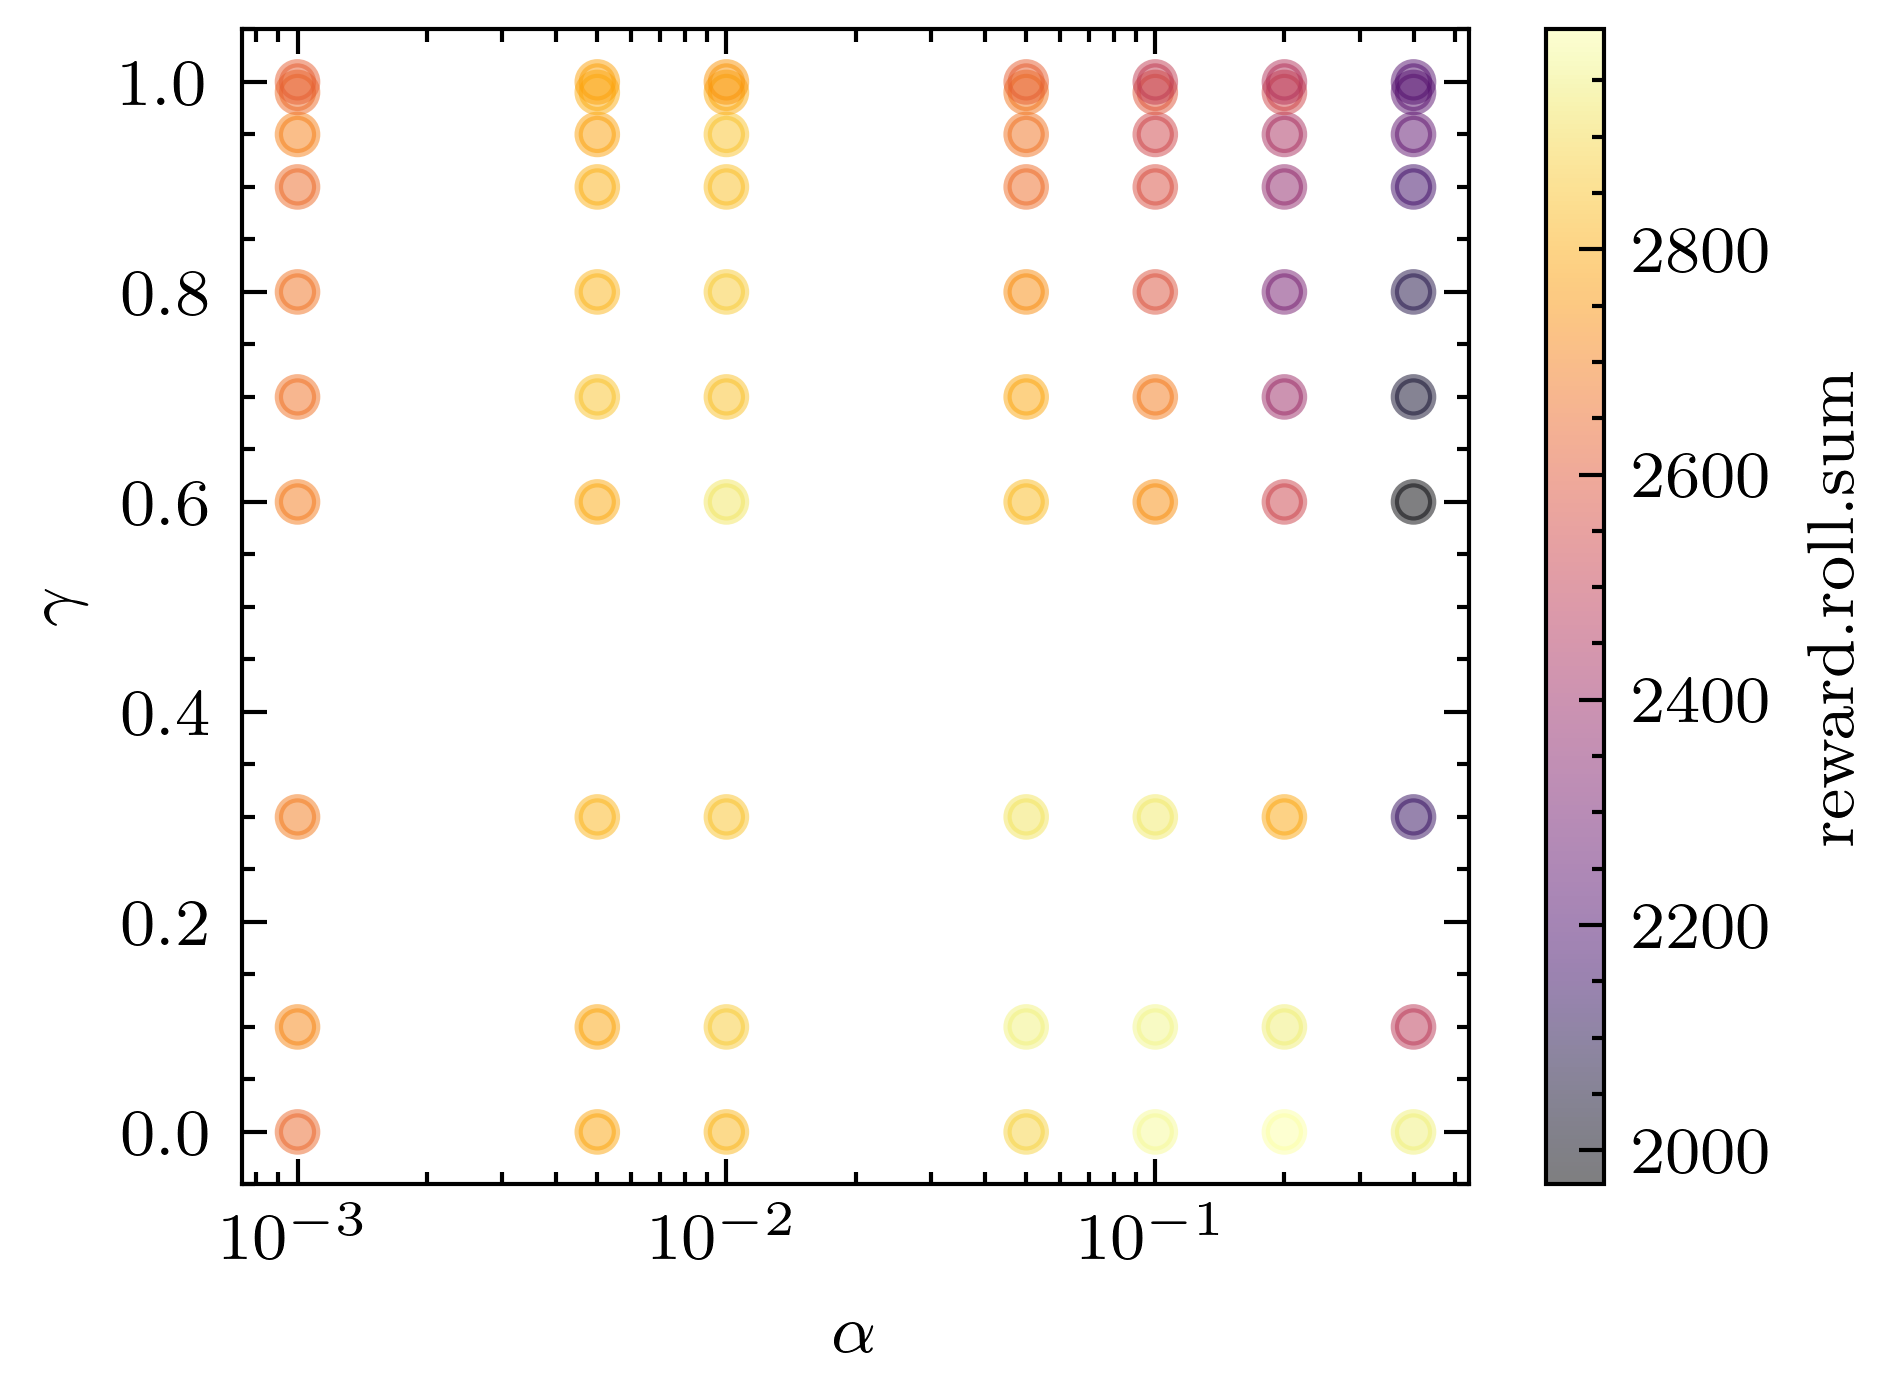

In [35]:
(
    df_results
    .plot.scatter(
        x='qtable.alpha', y='qtable.gamma',
        c='reward.roll.sum', colormap='inferno',
        alpha=0.5
    )
)

plt.ylabel(f'$\\gamma$')
plt.xlabel(f'$\\alpha$')
plt.xscale('log')
plt.show()
plt.close()

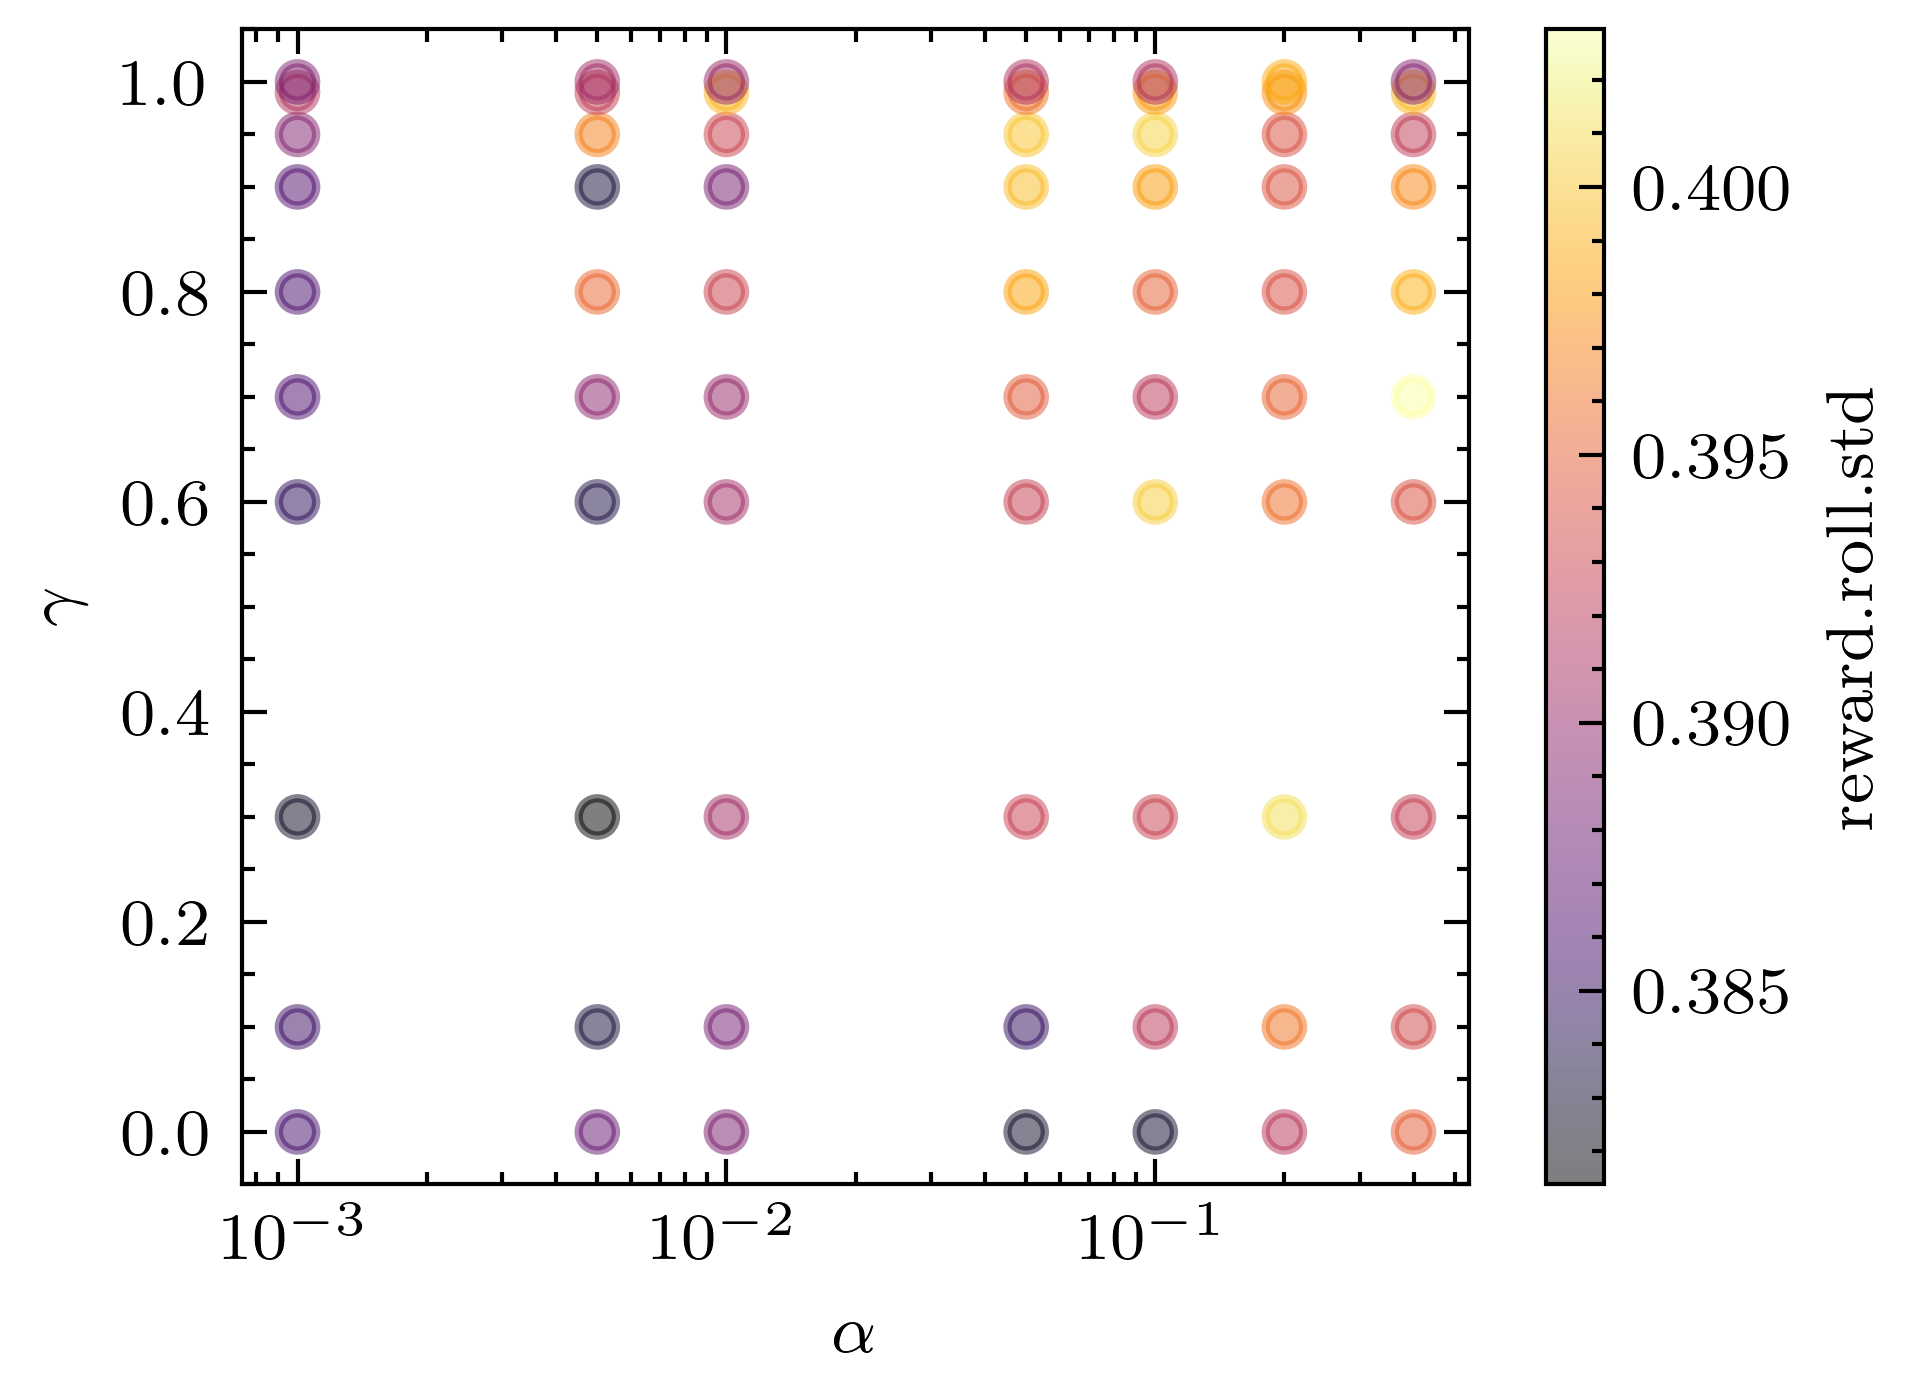

In [34]:
(
    df_results
    .plot.scatter(
        x='qtable.alpha', y='qtable.gamma',
        c='reward.roll.std', colormap='inferno',
        alpha=0.5
    )
)

plt.ylabel(f'$\\gamma$')
plt.xlabel(f'$\\alpha$')
plt.xscale('log')
plt.show()
plt.close()

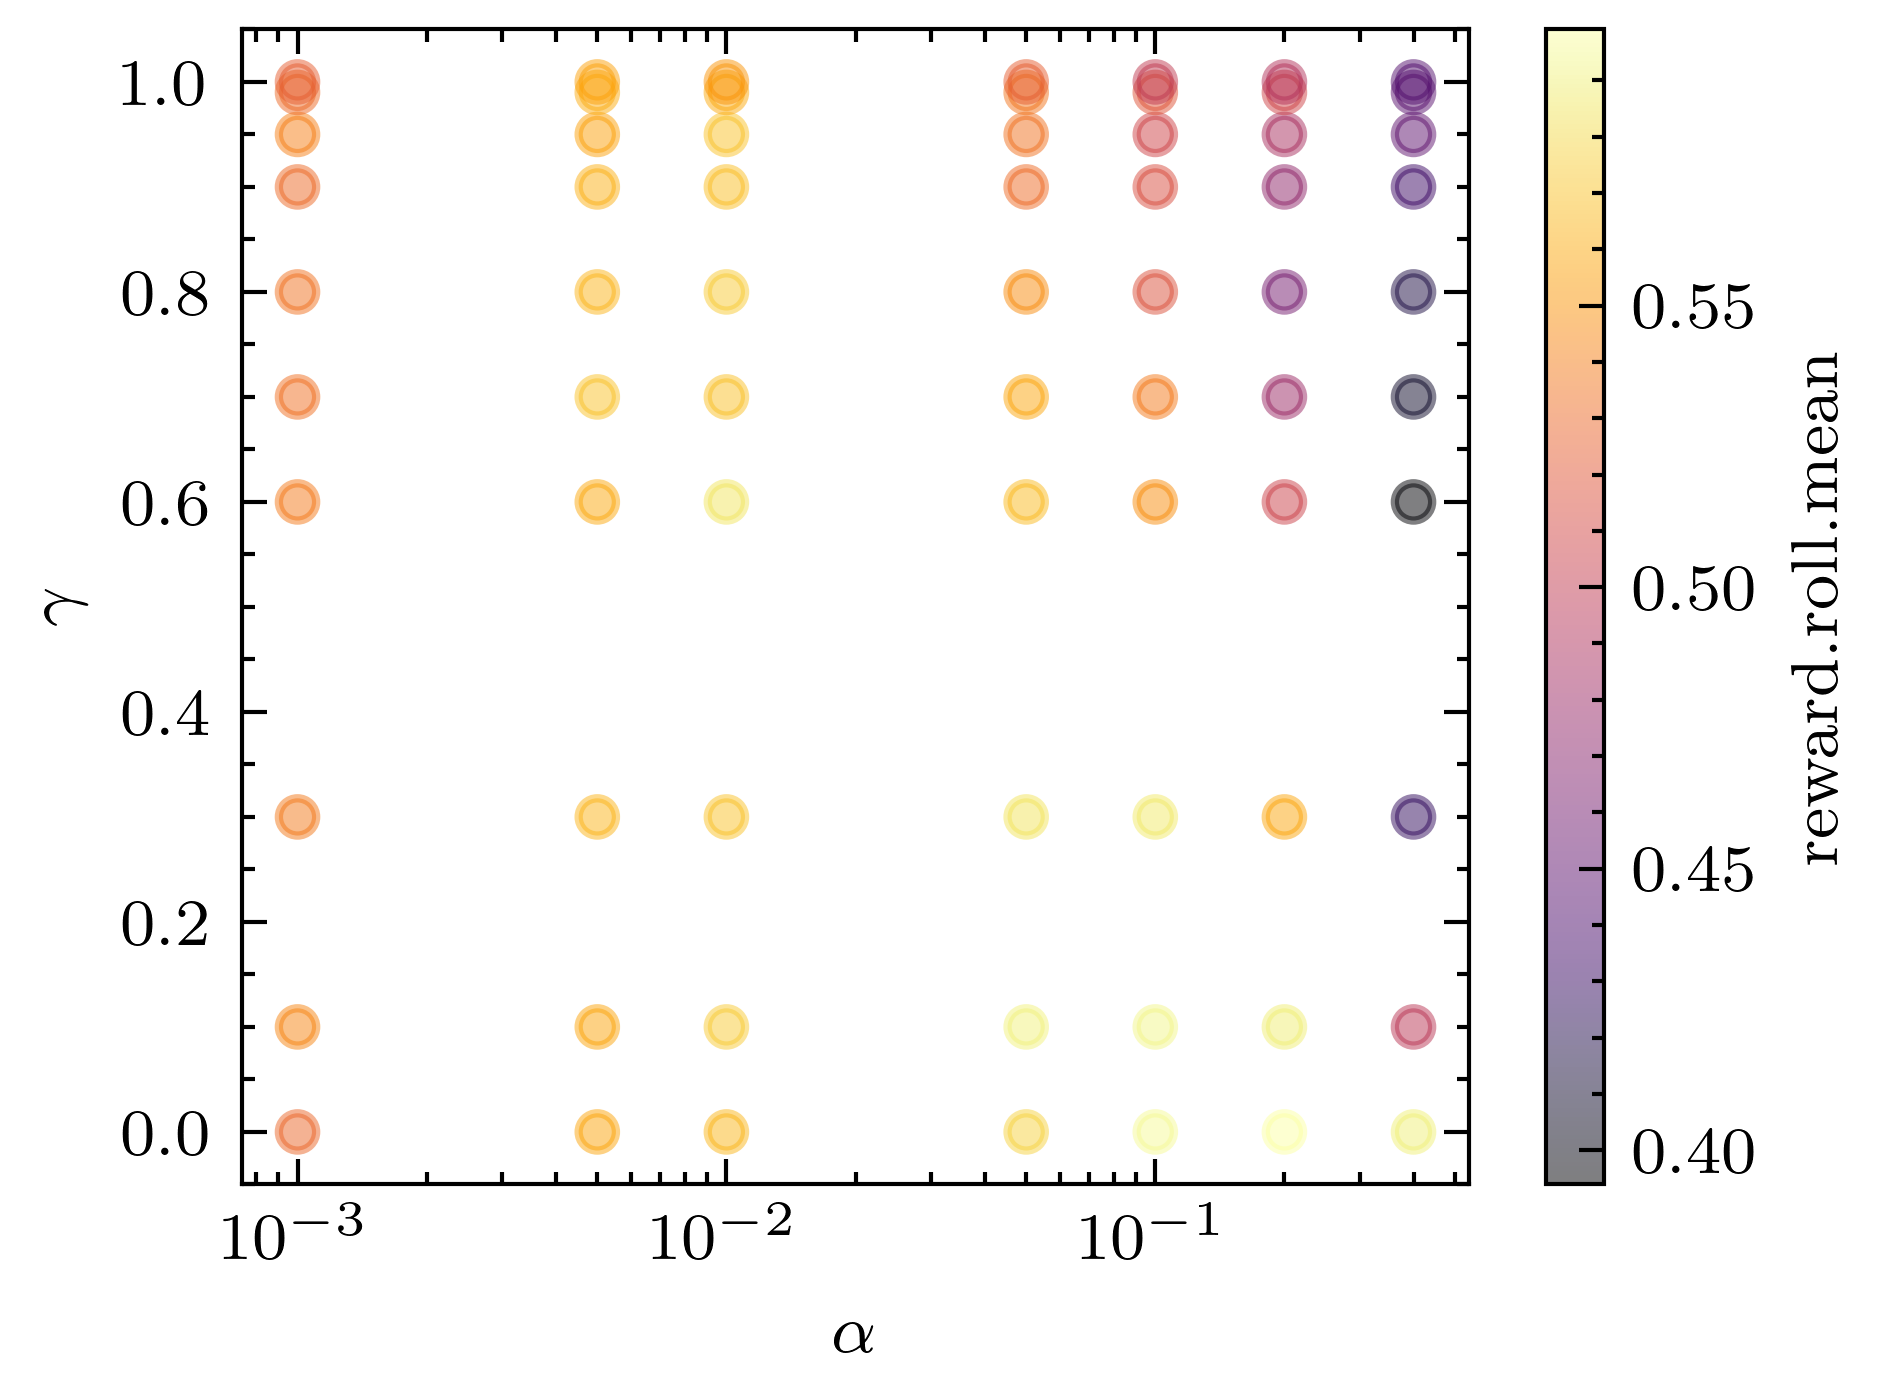

In [33]:
(
    df_results
    .plot.scatter(
        x='qtable.alpha', y='qtable.gamma',
        c='reward.roll.mean', colormap='inferno',
        alpha=0.5
    )
)

plt.ylabel(f'$\\gamma$')
plt.xlabel(f'$\\alpha$')
plt.xscale('log')
plt.show()
plt.close()

# Inspect QTable

In [21]:
params_best = (
    concat
    .filter(
        (pl.col('qtable.gamma') == 0.0)
        & (pl.col('qtable.alpha') == 0.1)
    )
)

In [ ]:
import pickle
import seaborn as sns

In [ ]:
import numpy as np

In [46]:
qtables = list()
for elem in params_best['path']:
    with open(Path(elem).parent.parent / 'blackjack__qtable_values.pickle', 'rb') as f:
        qtables.append(pickle.load(f))

In [52]:
qtable_avg = np.stack([elem.table_ for elem in qtables]).mean(axis=0)

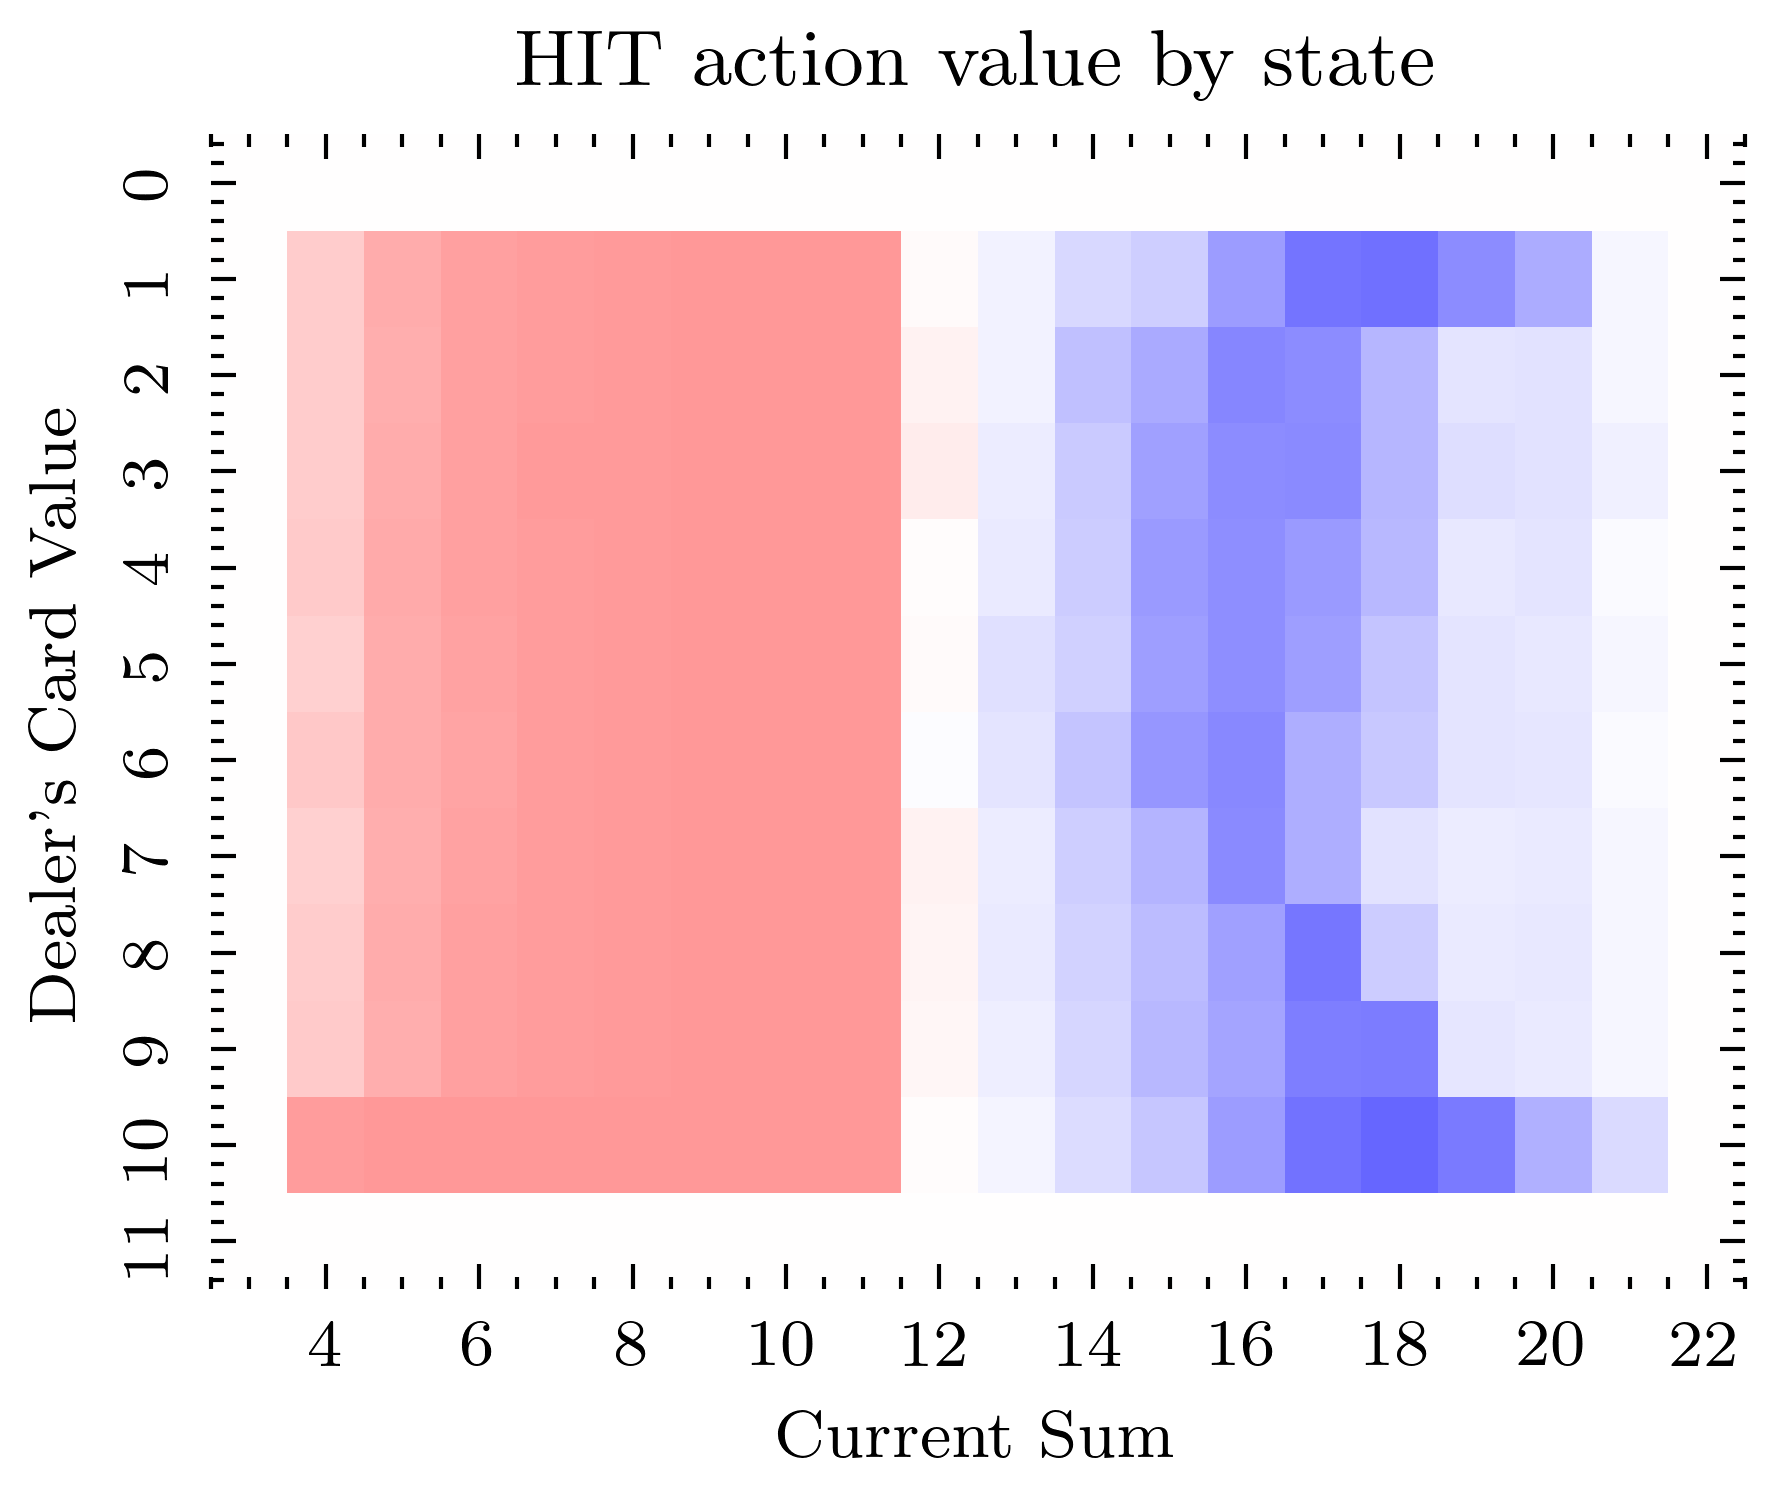

In [54]:
sns.heatmap(
    qtable_avg[:23, :, 0, 1].transpose(),
    cbar=False, cmap='bwr',
    vmin=-2.5, vmax=+2.5,
)
plt.title('HIT action value by state')
plt.ylabel('Dealer\'s Card Value')
plt.xlabel('Current Sum')
plt.xlim(3, 23)
plt.show()
plt.close()

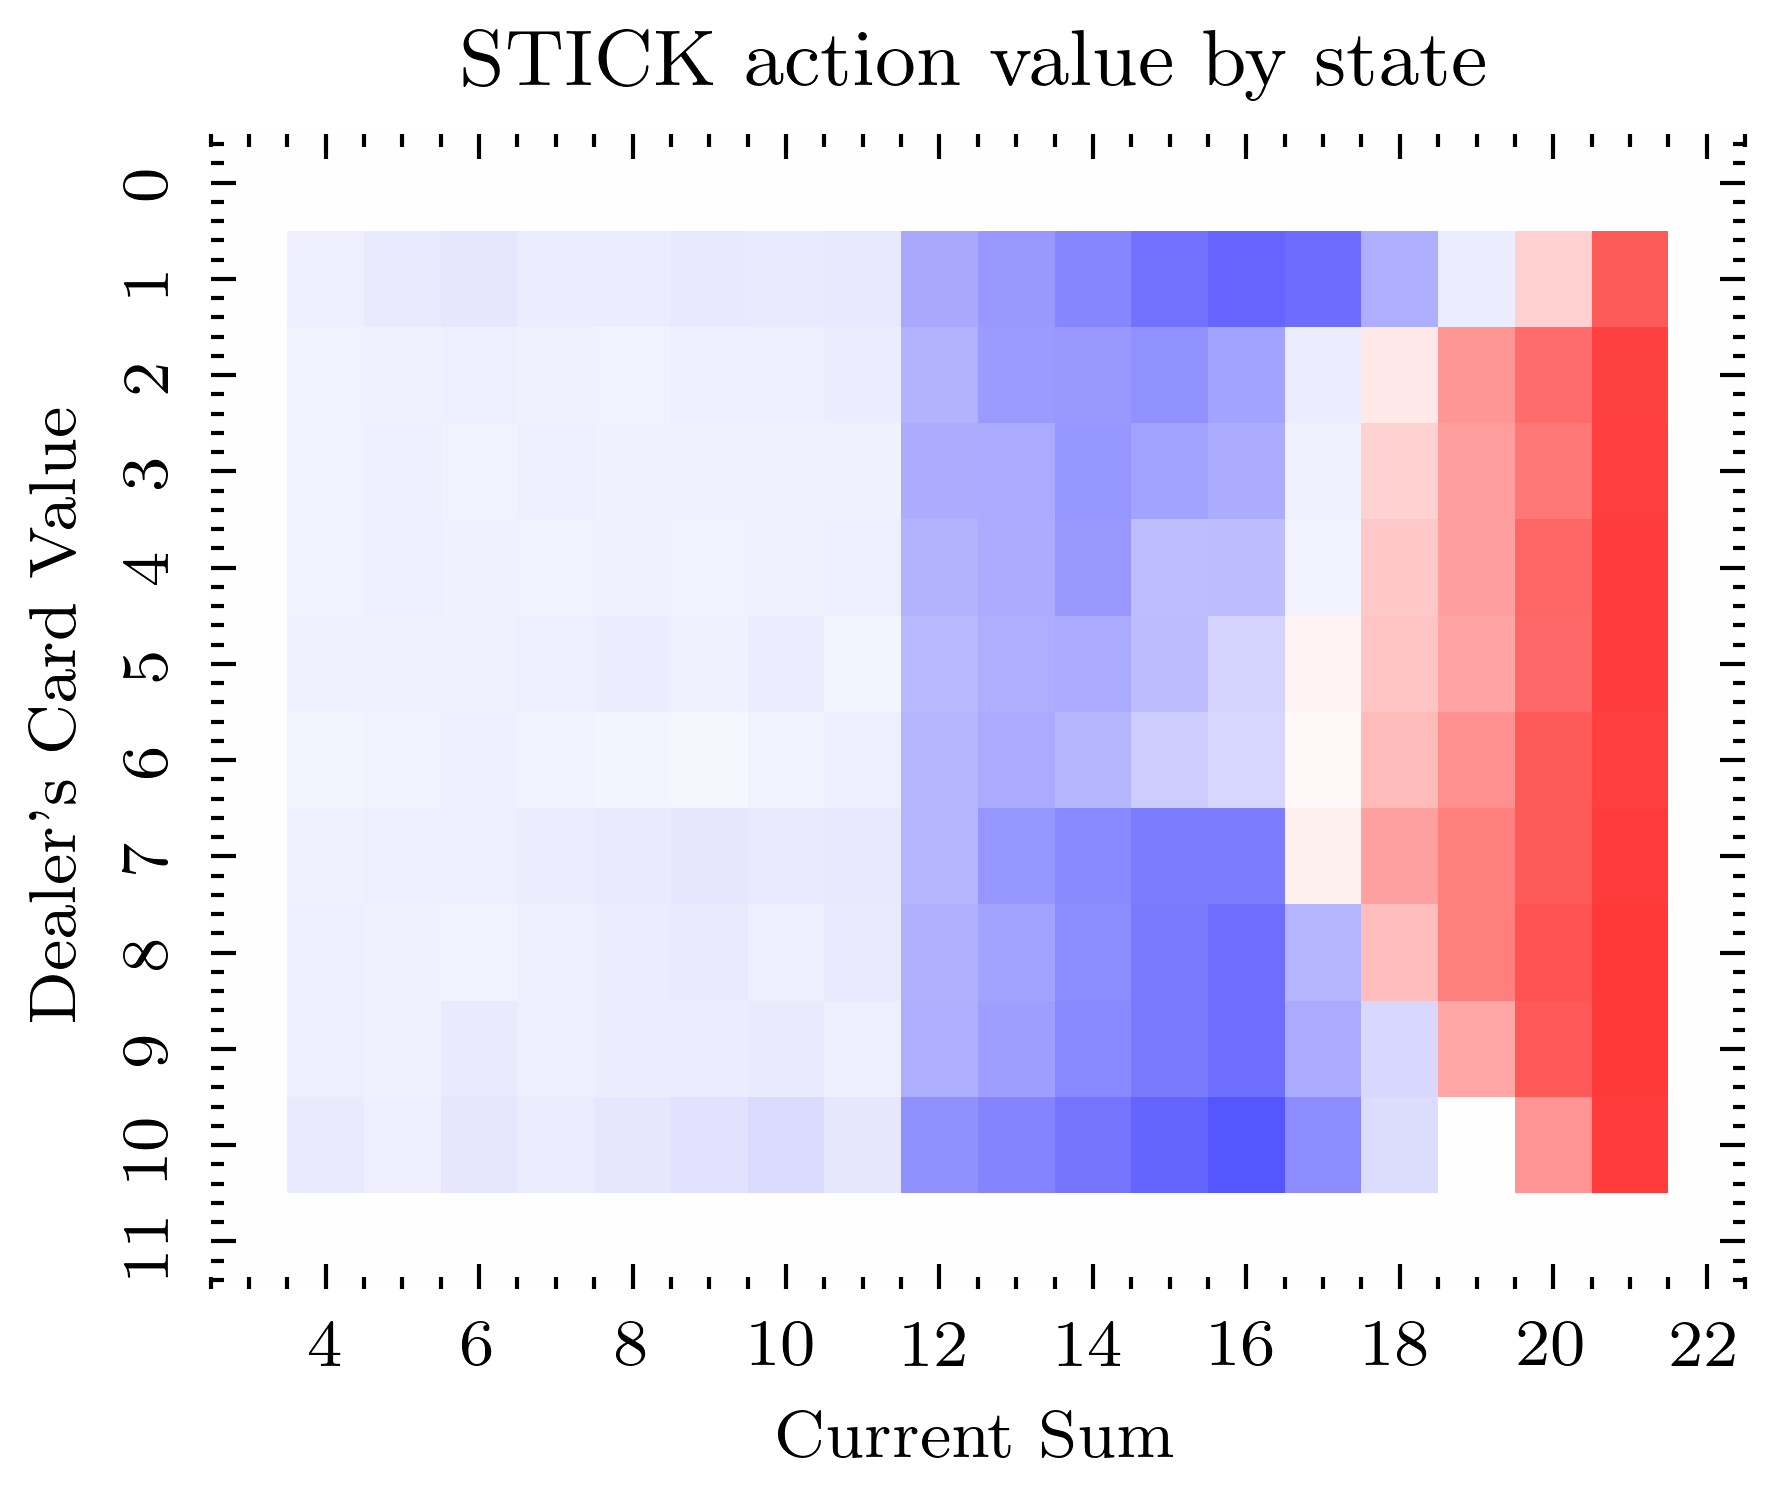

In [55]:
sns.heatmap(
    qtable_avg[:23, :, 0, 0].transpose(),
    cbar=False, cmap='bwr',
    vmin=-2.5, vmax=+2.5,
)
plt.title('STICK action value by state')
plt.ylabel('Dealer\'s Card Value')
plt.xlabel('Current Sum')
plt.xlim(3, 23)
plt.show()
plt.close()

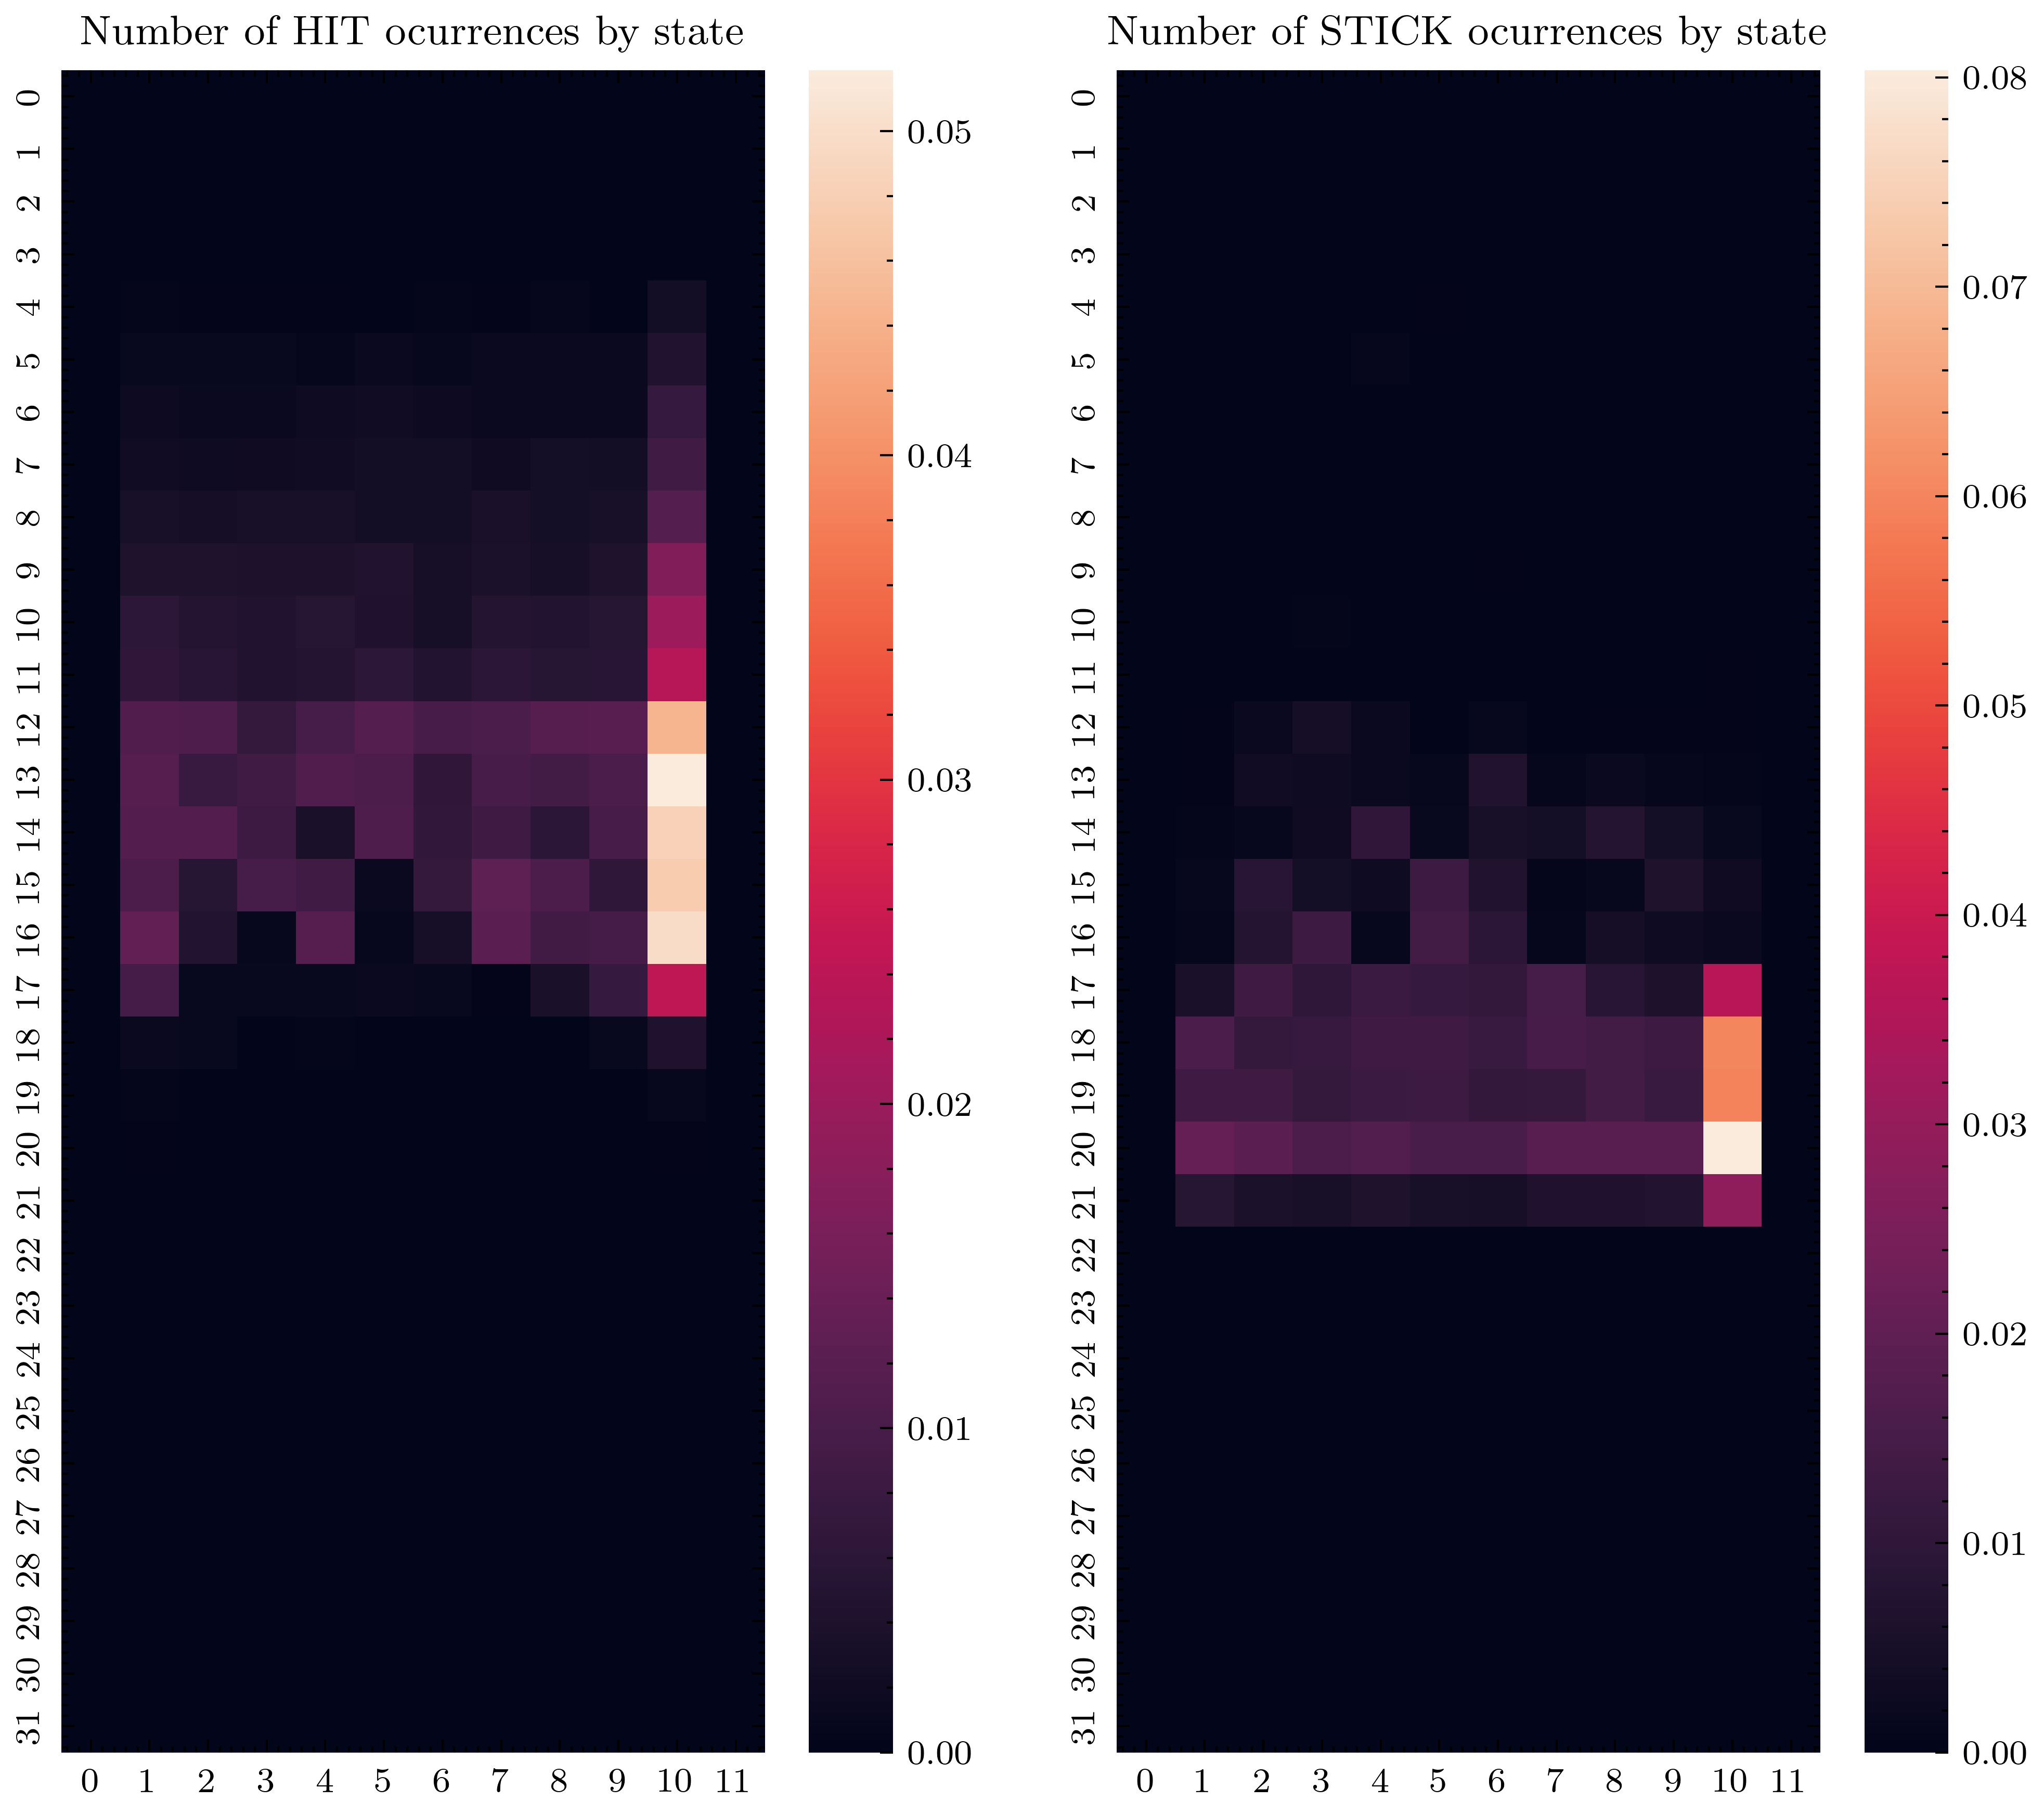

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(8, 7), sharex='all')

arr = qtable.ocurrences_[:, :, 0, 1]
sns.heatmap(arr / arr.sum(), ax=ax[0])
ax[0].set_title('Number of HIT ocurrences by state')

arr = qtable.ocurrences_[:, :, 0, 0]
sns.heatmap(arr / arr.sum(), ax=ax[1])
ax[1].set_title('Number of STICK ocurrences by state')

plt.show()

---